<a href="https://colab.research.google.com/github/tanzil7/Assignment-3---AI/blob/main/Assignment%203%20-%20Aritifical%20Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
For this assignment, I found a dataset on drugs. This dataset is centered around the idea of patients and what type of issues they have that can be used to determine the type of drug they need.
 I decided to use this dataset because I did something similar to this in high school. I will use Linear Regression to predict that older patients will have higher sodium to potassium ration in blood(Na_to_K).

For my classification part, I found a dataset on NYPD Complaint Data Historic. I decided to use this classificaton dataset because I am entering in the law enforcement and an interested with topics relating the the NYPD. I will use Neural Network to classify the outcomes of the suspect bases on their attributes

# Section 1: Regression Dataset Prep
- At a high level, discuss what columns are included in the data:

    For my regression dataset, there are 6 columns which are the following: 
        1. Age which is age of the patients
        2. Sex which is gender of patients
        3. BP which is the blood pressure levels
        4. Cholesterol which is the cholesterol levels
        5. Na_to_K which is the sodium to potassium Ration in Blood
        6. Drug which is the drug type

In [ ]:
import pandas as pd
import numpy as np

drug200 = pd.read_csv("drug200.csv")
drug200

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# Here, I am using the first 50 rows of my Drug dataset
drug200.head(50)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


Essentially, what I want to predict is that patients who are older are more likely to have higher sodium to potassium ration in blood compared to younger patients.

I will be using the following columns. 
    
    1. Age 
    
    2. Na_to_K
    
Essentially, Older patients (what we are trying to predict) have higher higher sodium to potassium ration in blood compared to younger patients.



- Clean the data if needed using pandas
  
For my dataset, I did not need to clean it since the two columns that I am using have no invalid data values.


# Section 2: Regression

For my dataset, I am going to choose patient age to predict that the older they are, the higher sodium to potassium ration in their blood.
    
By looking at my dataset, I predict that older patients have higher sodium to potassium ration in blood. My reasoning behind this comes from the fact elder people tend to have greater changces of having a heart attack or stroke, needing bypass surgery or angioplasty, or dying of cardiovascular disease due the reason of having high sodium to potassiu ration in their blood.

The dataset has 200 rows which is a sufficent amount of data. Now, to spilt the data so that the data we obtain is far more accurate and better cleaned up for the graph, I will be using 90% (basically 180 rows) for training and 10% (20 rows) for testing.

In [ ]:
# Use sklearn to split our dataset 
from sklearn.model_selection import train_test_split
from sklearn import svm

# Getting the age column as a subset of the data to use for features
x = drug200[["Age"]]

# Getting the Na_to_k as a subset of the data to use for prediction
y = drug200["Na_to_K"]

# Using sklearn to split the data between a training set and testing set
# 180 rows for training and 20 rows for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 20, train_size = 180, shuffle = True)
# We have x_train, y_train and have x_test, y_test

Here, essentially now will be having the linear regression fit. This will be done using the training set


In [ ]:
# import (like shown in the examples from the links)
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

Coefficients: 
 [-0.02756067]
The mean squared error is the following: 45.712630529898384
Coeff. of Determination: -0.030984660059433233
Now, we have the score which is from retrieved from cross-validation: -0.030984660059433233


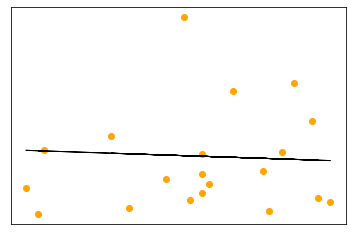

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

prediction = reg.predict(x_test)

print("Coefficients: \n", reg.coef_)

# Mean squared error
print("The mean squared error is the following:", mean_squared_error(y_test, prediction))

# A value of 1.0 indicates a perfect fit
print("Coeff. of Determination:", r2_score(y_test, prediction))

# The socre outcome printed:
print("Now, we have the score which is from retrieved from cross-validation:", reg.score(x_test,y_test))

# I used the colors: orange and black 
plt.scatter(x_test, y_test,  color = 'orange')
plt.plot(x_test, prediction, color = 'black', linewidth = 1)


plt.xticks(())
plt.yticks(())

plt.show()


    The last part for this asks for an explanation of what we are seeing from this graph:
    
    By looking at my regression that I have just gotten, I can see that my prediction isn't correct. I was predicting that the older you are, rising blood ration would be higher. Based on this graph, my assumption is not correct.
    
    Looking into details, the mean squared error of the test set is 45.712630529898384 and a score of -0.030984660059433233. From this you can see that my prediction is not entirely correct. This can be due to the fact of genetics, the environment people grow in, also it depends on the income of people because it is proven that rich people eat healthier where as    poor people have unhealthy food.

# Section 3: Classification Dataset Prep
 For my NYPD _Complaint_Data_Historic classification dataset, there are 35 columns which are the following: 
        
        
1. CMPLNT_NUM which randomly generates persistent ID for each complaint 
2. CMPLNT_FR_DT for the exact date of occurrence for the reported event 
3. CMPLNT_FR_TM for exact time of occurrence for the reported event 
4. CMPLNT_TO_DT for the ending date of occurrence for the reported event, if exact time of occurrence is unknown
5. CMPLNT_TO_TM which is the ending time of occurrence for the reported event, if exact time of occurrence is unknown 
6. ADDR_PCT_CD is for the precinct in which the incident occurred 
7. RPT_DT is tge date event was reported to police 
8. KY_CD is the three digit offense classification code 
9. OFNS_DESC for the description of offense corresponding with key code
10. PD_CD for the three digit internal classification code (more granular than Key Code) 
11. PD_DESC is the description of internal classification corresponding with PD code
12. CRM_ATPT_CPTD_CD is the indicator of whether crime was successfully completed or attempted
13. LAW_CAT_CD is the level of offense: felony, misdemeanor, violation 
14. BORO_NM for the name of the borough in which the incident occurred 
15. LOC_OF_OCCUR_DESC the specific location of occurrence in or around the premises
16. PREM_TYP_DESC specific description of premises
17. JURIS_DESC is description of the jurisdiction code 
18. JURISDICTION_CODE is the jurisdiction responsible for incident
19. PARKS_NM is the name of NYC park, playground or greenspace of occurrence, if applicable
20. HADEVELOPT is the name of NYCHA housing development of occurrence, if applicable
21. HOUSING_PSA is the development Level Code
22. X_COORD_CD is the X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet
23. Y_COORD_CD is the Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet 
24. SUSP_AGE_GROUP is the suspect’s Age Group
25. SUSP_RACE is the suspect’s Race Description 
26. SUSP_SEX is the suspect’s Sex Description 
27. TRANSIT_DISTRICT is the Transit district in which the offense occurred
28. Latitude is the Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees
29. Longitude is the Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees
30. Lat_Lon is the coordinate
31. PATROL_BORO for the name of the patrol borough in which the incident occurred
32. STATION_NAME is the Transit station name
33. VIC_AGE_GROUP is Victim’s Age Group
34. VIC_RACE is the Victim’s Race Description,
35. VIC_SEX is for the victim’s Sex Description



In [ ]:
#Load the dataset using pandas 
import pandas as pd
pd.set_option('display.max_columns', 35)
NYPD_Complaint_Data_Historic = pd.read_csv("NYPD_Complaint_Data_Historic.csv", low_memory=False) #https://www.kaggle.com/mrmorj/new-york-city-police-crime-data-historic?select=NYPD_Complaint_Data_Historic.csv
NYPD_Complaint_Data_Historic
#using pandas to load the output of the all the columns 

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,TILDEN,405,1009656.0,181287.0,25-44,BLACK,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1014035.0,174133.0,NaN,NaN,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000222.0,179282.0,<18,BLACK,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,RAPE 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1025420.0,202485.0,25-44,WHITE HISPANIC,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,992848.0,228356.0,NaN,NaN,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521491,225471008,12/02/2018,04:15:00,12/02/2018,04:17:00,109.0,12/02/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1023892.0,225321.0,25-44,WHITE HISPANIC,M,NaN,40.785050,-73.856852,"(40.785049616, -73.856851768)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F
6521492,368441925,01/20/2018,00:08:00,04/26/2019,12:00:00,25.0,04/26/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,F,NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,NaN,25-44,BLACK,M
6521493,146134182,08/03/2018,22:30:00,08/04/2018,06:30:00,41.0,08/04/2018,121,CRIMINAL MISCHIEF & RELATED OF,267.0,"MISCHIEF, CRIMINAL 3 & 2, OF M",COMPLETED,FELONY,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1010924.0,236074.0,NaN,NaN,NaN,NaN,40.814612,-73.903637,"(40.814612305, -73.903637247)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
6521494,763119484,12/10/2018,11:00:00,12/21/2018,15:00:00,107.0,04/10/2019,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,U,NaN,NaN,NaN,NaN,PATROL BORO QUEENS SOUTH,NaN,18-24,ASIAN / PACIFIC ISLANDER,M


In [ ]:
NYPD_Complaint_Data_Historic.head(50)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,TILDEN,405,1009656.0,181287.0,25-44,BLACK,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1014035.0,174133.0,NaN,NaN,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000222.0,179282.0,<18,BLACK,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,RAPE 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1025420.0,202485.0,25-44,WHITE HISPANIC,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,992848.0,228356.0,NaN,NaN,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F
5,944253539,08/28/2013,11:00:00,08/28/2013,11:30:00,63.0,08/28/2013,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,DEPARTMENT STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1007048.0,167105.0,NaN,NaN,NaN,NaN,40.625320,-73.917874,"(40.625319998, -73.917873518)",PATROL BORO BKLYN SOUTH,NaN,NaN,UNKNOWN,D
6,608679532,12/04/2013,18:30:00,12/04/2013,18:40:00,101.0,12/05/2013,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1051824.0,158026.0,NaN,WHITE HISPANIC,F,NaN,40.600172,-73.756663,"(40.600171728, -73.756663063)",PATROL BORO QUEENS SOUTH,NaN,45-64,BLACK,F
7,882178622,09/14/2013,08:40:00,09/14/2013,08:40:00,49.0,09/14/2013,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1022583.0,249362.0,45-64,BLACK,M,NaN,40.851041,-73.861441,"(40.851041106, -73.861441322)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
8,240183498,01/31/2013,23:47:00,NaN,NaN,40.0,01/31/2013,352,CRIMINAL TRESPASS,205.0,"TRESPASS 2, CRIMINAL",COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,NaN,811,1007373.0,232752.0,NaN,NaN,NaN,NaN,40.805504,-73.916477,"(40.805504347, -73.916477252)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,E
9,895680254,09/17/2016,00:05:00,09/17/2016,00:15:00,60.0,09/17/2016,351,CRIMINAL MISCHIEF & RELATED OF,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,984501.0,147851.0,UNKNOWN,BLACK,M,NaN,40.572501,-73.999098,"(40.572500982, -73.999097946)",PATROL BORO BKLYN SOUTH,NaN,25-44,BLACK,F


For the columns you will be using in your classification, describe the range of values:

I have the following:
    
    1.SUSP_AGE_GROUP has range of: 18-24, 25-44, 45-64 
    2.SUSP_RACE has range of: White, Black, other
    3.BORO_NM has range of: Brooklyn, Manhttan, other


# Section 4: Classification with Logistic Regression


 For my classification dataset I have 6521496  row, which is a large dataset. 
 
I will be spliting my data by using 90% (5869346 of rows) for training and 10% (652150 of rows) for testing



In [ ]:
from sklearn.linear_model import LogisticRegression

x_val= NYPD_Complaint_Data_Historic [["SUSP_AGE_GROUP","BORO_NM"]]

y_val= NYPD_Complaint_Data_Historic [["SUSP_RACE"]]

# using sklearn to split the data between a testing and training set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_val, y_val, test_size = 652150, train_size = 5869346, shuffle=True)
#x_train2, y_train2
#x_test2, y_test2


# Conclusions

For my regression part, I used linear regression to predict that older a person is, their level of sodium to potassium ration in blood is higher compared to younger patients. Based on my results that I received, there doesn't seem to be any connection between being older and having high level of sodium to potassium ration in blood. This can be due to many external factors, such as simply our lifestyle. I believe a person's income has alot to do with health. I found it interesting that there is not a relationship bc you were under the impression that older people tend to have higher risks. To extend this project further, I would use more columns and compare young people's health and older people's health. 


For my classification part, I was not really able to do much due to time constraints. I was really trying to prove that white male are less criminals compared to other race. 